# Set up

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import healpy as hp
import sys
from tqdm import tqdm, tqdm_notebook

In [2]:
# import our modules
sys.path.insert(0, './utils')
from my_units import * 
from angular_fn import * 

In [3]:
# for plots
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcdefaults()
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import colors
rcParams['mathtext.rm'] = 'Times New Roman' 
rcParams['text.usetex'] = True
rcParams['font.family'] = 'times' #'sans-serif'

font_manager.findfont('serif', rebuild_if_missing=True)
fontsize = 14
rcParams.update({'font.size':fontsize})

In [5]:
# setup path to directories where data are stored and figures are saved
DataDir = '/Users/crimondino/Dropbox (PI)/LensVelocity2/data/star_star/' 
FigDir = './figures/'

# Stellar density plots

## Sky maps

In [5]:
nside = 2**7
npix = hp.nside2npix(nside)
print('nside =',nside,', npix =',npix)
print('linear pixel size =',str(np.sqrt(4*np.pi / npix) / degree)[0:7],' degree')

nside = 128 , npix = 196608
linear pixel size = 0.45806  degree


### Clean data (after ruwe and distance cuts)

In [8]:
# read in the clean data files (after the ruwe and distance cuts)
df_fore = pd.read_csv(DataDir+'fg_clean.csv', usecols = ['l', 'b'])
df_back = pd.read_csv(DataDir+'bg_clean.csv', usecols = ['l', 'b'])
len(df_back), len(df_fore)

(15138051, 15138051)

In [9]:
fore_l, fore_b = df_fore['l'].to_numpy(), df_fore['b'].to_numpy() 
back_l, back_b = df_back['l'].to_numpy(), df_back['b'].to_numpy() 

q_pix_1 = hp.ang2pix(nside, fore_l,fore_b, lonlat=True)
q_pix_2 = hp.ang2pix(nside, back_l, back_b, lonlat=True)
pix_coords = np.asarray(hp.pixelfunc.pix2ang(nside,np.arange(npix))).transpose()

In [14]:
map_count_1 = np.zeros(hp.nside2npix(nside));
map_count_2 = np.zeros(hp.nside2npix(nside));
for idx, ipix in tqdm(enumerate(q_pix_1)):
    map_count_1[ipix] += 1

15138051it [00:07, 2031469.65it/s]


<ipython-input-25-88eb607280b5>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(FigDir+'pairs_map_new.pdf',figsize=(8,6),bbox_inches='tight') #,bbox_extra_artists=(image,)',dpi=300,)


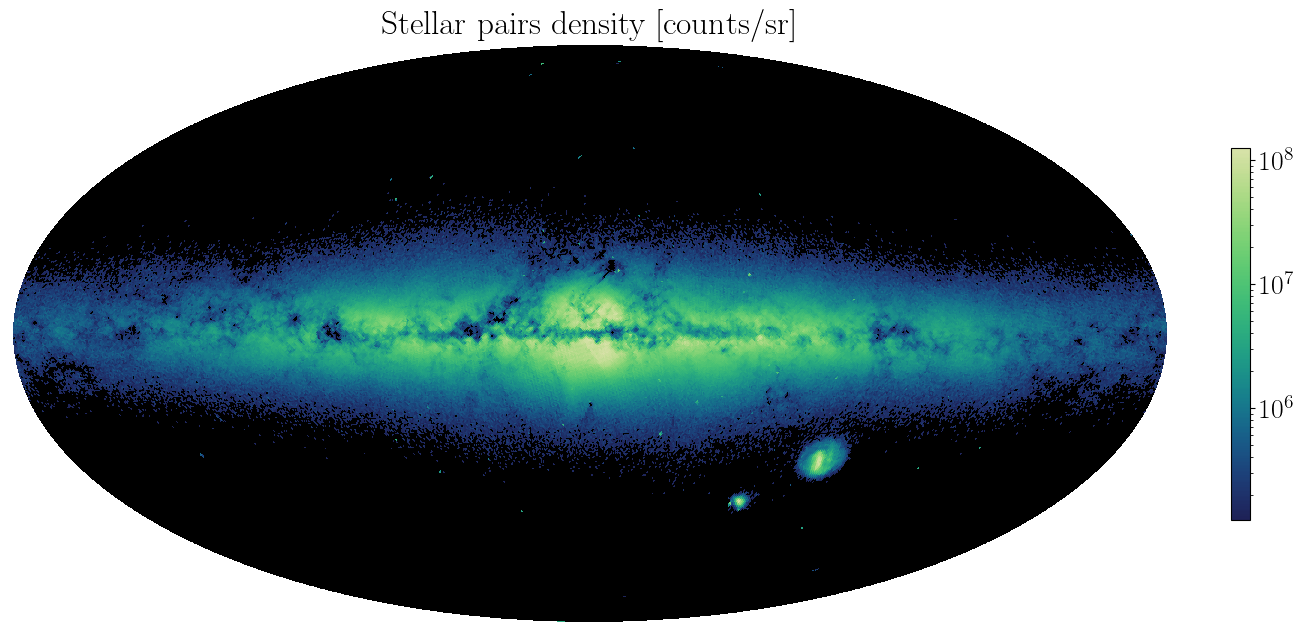

In [25]:
mpl.rcParams.update({'font.size': 20})

map = 1e-10 + map_count_1 / (hp.pixelfunc.nside2resol(nside))**2 
map_min = 1e-3 * np.max(map); map_max = np.max(map); 
#cmap = copy.copy(mpl.cm.get_cmap("viridis"))
cmap = sns.cubehelix_palette(start = 0.25, hue = 1.5, rot = -2/3, reverse = True, as_cmap=True)
#cmap = copy.copy(mpl.cm.get_cmap("RdBu_r"))
cmap.set_under(cmap(0)); cmap.set_bad(cmap(0)); cmap.set_over(cmap(1));
#cmap.set_under('white'); cmap.set_over('black')
plt.subplots(1,1,figsize=(16,8))
hp.mollview(map, title=r'Stellar pairs density [counts/sr]',  
            cmap=cmap,cbar=None, 
            bgcolor='black',badcolor='white',
            min=map_min,max=map_max,
            xsize=5000,hold=True,
            norm=mpl.colors.LogNorm(vmin=map_min,vmax=map_max))
fig = plt.gcf()
ax = plt.gca()
image = ax.get_images()[0]
cbar = fig.colorbar(image, ax=ax,fraction=0.015);
#cbar.set_label(r'$\Sigma_\mathrm{pair} \, [\mathrm{counts/sr}]$', fontsize=16)

mpl.rcParams.update({'font.size': fontsize})

fig.savefig(FigDir+'pairs_map.pdf',figsize=(8,6),bbox_inches='tight') #,bbox_extra_artists=(image,)',dpi=300,)

### Final data (after background subtraction and outlier removal)

In [6]:
# read in the clean data files (after the ruwe and distance cuts)
df_fore = pd.read_csv(DataDir+'fg_subtracted.csv', usecols = ['l', 'b'])
df_back = pd.read_csv(DataDir+'bg_subtracted.csv', usecols = ['l', 'b'])
len(df_back), len(df_fore)

(11690246, 11690246)

In [7]:
fore_l, fore_b = df_fore['l'].to_numpy(), df_fore['b'].to_numpy() 
back_l, back_b = df_back['l'].to_numpy(), df_back['b'].to_numpy() 

q_pix_1 = hp.ang2pix(nside, fore_l,fore_b, lonlat=True)
q_pix_2 = hp.ang2pix(nside, back_l, back_b, lonlat=True)
pix_coords = np.asarray(hp.pixelfunc.pix2ang(nside,np.arange(npix))).transpose()

In [8]:
map_count_1 = np.zeros(hp.nside2npix(nside));
map_count_2 = np.zeros(hp.nside2npix(nside));
for idx, ipix in tqdm(enumerate(q_pix_1)):
    map_count_1[ipix] += 1

11690246it [00:05, 1972135.34it/s]


<ipython-input-9-7d5387a637ba>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(FigDir+'pairs_map_2_new.pdf',figsize=(8,6),bbox_inches='tight') #,bbox_extra_artists=(image,)',dpi=300,)


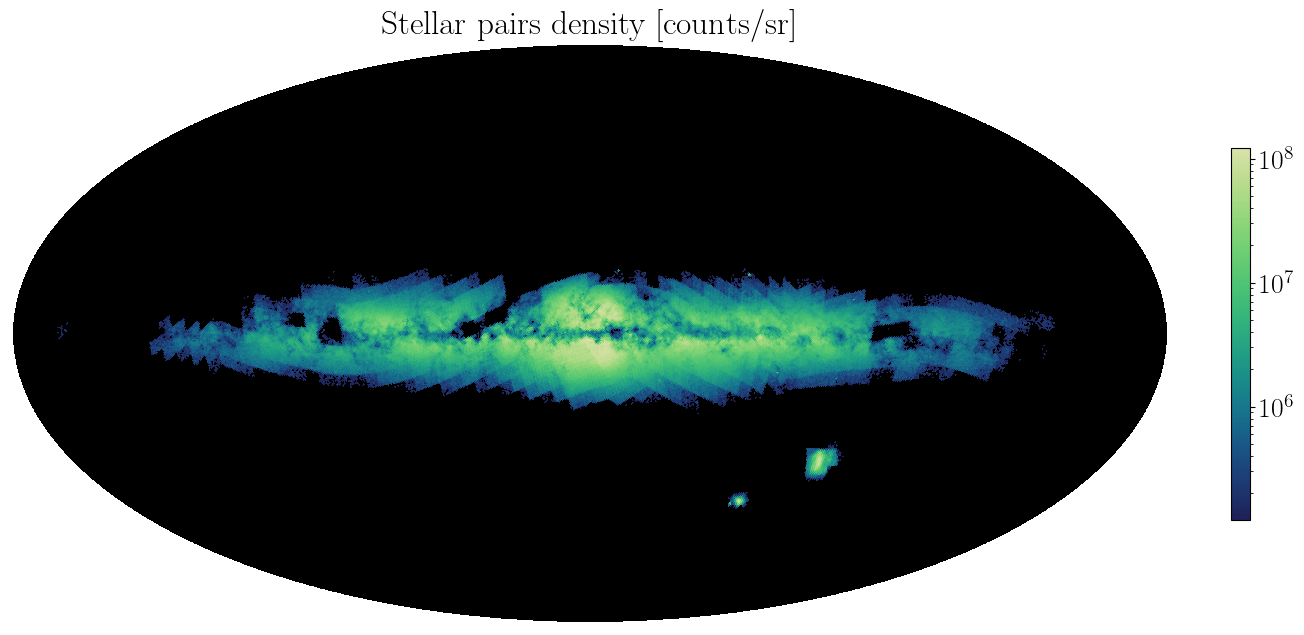

In [9]:
mpl.rcParams.update({'font.size': 20})

map = 1e-10 + map_count_1 / (hp.pixelfunc.nside2resol(nside))**2 
map_min = 1e-3 * np.max(map); map_max = np.max(map); 
#cmap = copy.copy(mpl.cm.get_cmap("viridis"))
cmap = sns.cubehelix_palette(start = 0.25, hue = 1.5, rot = -2/3, reverse = True, as_cmap=True)
#cmap = copy.copy(mpl.cm.get_cmap("RdBu_r"))
cmap.set_under(cmap(0)); cmap.set_bad(cmap(0)); cmap.set_over(cmap(1));
#cmap.set_under('white'); cmap.set_over('black')
plt.subplots(1,1,figsize=(16,8))
hp.mollview(map, title=r'Stellar pairs density [counts/sr]',  
            cmap=cmap,cbar=None, 
            bgcolor='black',badcolor='white',
            min=map_min,max=map_max,
            xsize=5000,hold=True,
            norm=mpl.colors.LogNorm(vmin=map_min,vmax=map_max))
fig = plt.gcf()
ax = plt.gca()
image = ax.get_images()[0]
cbar = fig.colorbar(image, ax=ax,fraction=0.015);
#cbar.set_label(r'$\Sigma_\mathrm{pair} \, [\mathrm{counts/sr}]$', fontsize=16)

mpl.rcParams.update({'font.size': fontsize})

fig.savefig(FigDir+'pairs_map_2_new.pdf',figsize=(8,6),bbox_inches='tight') #,bbox_extra_artists=(image,)',dpi=300,)

## Impact parameter density plots

In [6]:
# read in the clean data files (after the ruwe and distance cuts)
df_fore = pd.read_csv(DataDir+'fg_subtracted.csv', usecols = ['source_id', 'ra', 'dec', 'pmra', 'pmdec', 'l', 'b'])
df_back = pd.read_csv(DataDir+'bg_subtracted.csv', usecols = ['ra', 'dec', 'l', 'b'])
len(df_back), len(df_fore)

(11690246, 11690246)

### All the pairs

In [7]:
# compute ecliptic coordinates
df_back['ecl_lon'], df_back['ecl_lat'] = fn_eq_to_ecl_array(df_back['ra'].to_numpy(), df_back['dec'].to_numpy())
df_fore['ecl_lon'], df_fore['ecl_lat'] = fn_eq_to_ecl_array(df_fore['ra'].to_numpy(), df_fore['dec'].to_numpy())

In [8]:
# angular impact parameter 
b_il = np.zeros((4, len(df_back), 2))

b_il[0] = fn_angular_sep(df_back['ra'].to_numpy()*degree, df_back['dec'].to_numpy()*degree, df_fore['ra'].to_numpy()*degree, df_fore['dec'].to_numpy()*degree)
b_il[1] = fn_angular_sep(df_back['ecl_lon'].to_numpy()*degree, df_back['ecl_lat'].to_numpy()*degree, df_fore['ecl_lon'].to_numpy()*degree, df_fore['ecl_lat'].to_numpy()*degree)
b_il[2] = fn_angular_sep(df_back['l'].to_numpy()*degree, df_back['b'].to_numpy()*degree, df_fore['l'].to_numpy()*degree, df_fore['b'].to_numpy()*degree)

In [9]:
mean_pml = np.array([np.mean(df_fore['pmra'].to_numpy()), np.mean(df_fore['pmdec'].to_numpy())])
mean_pml_hat = mean_pml/np.sqrt(mean_pml[0]**2 + mean_pml[1]**2)
mean_pml_hat

array([-0.62815705, -0.77808657])

In [10]:
vl_vec = np.array([df_fore['pmra'].to_numpy() , df_fore['pmdec'].to_numpy()]).T

vl_norm = np.sqrt(vl_vec[:, 0]**2 + vl_vec[:, 1]**2)
vl_hat = np.array([vl_vec[:, 0]/vl_norm, vl_vec[:, 1]/vl_norm]).T 
vl_perp_hat = np.array([-vl_hat[:, 1], vl_hat[:, 0]]).T

b_il[3][:, 0] = b_il[0][:, 0]*vl_hat[:, 0] + b_il[0][:, 1]*vl_hat[:, 1]
b_il[3][:, 1] = b_il[0][:, 0]*vl_perp_hat[:, 0] + b_il[0][:, 1]*vl_perp_hat[:, 1]

In [11]:
# plot setup

x_min, x_max, delta_x = -3, 3, 0.1
bins=np.arange(x_min,x_max+delta_x,delta_x)
x, y, counts = np.zeros( (len(b_il), (len(bins)-1)**2) ), np.zeros( (len(b_il), (len(bins)-1)**2) ), np.zeros( (len(b_il), (len(bins)-1)**2) )

for i in range(len(b_il)):
    
    tmp_counts, tmp_x, tmp_y = np.histogram2d((b_il[i]/arcsec)[:, 0], (b_il[i]/arcsec)[:, 1], bins=[bins, bins])
    tmp_x, tmp_y = np.meshgrid(tmp_x[:-1], tmp_y[:-1])
    x[i] = tmp_x.flatten(); y[i] = tmp_y.flatten()
    counts[i] = tmp_counts.T.flatten()
    
    # mask pixels at the boundary
    counts[i][ np.sqrt( (x[i]+delta_x/2)**2 + (y[i]+delta_x/2)**2) > (x_max - delta_x/4) ] = np.nan

8128.0
9819.0
9980.0
5490.0
6215.0


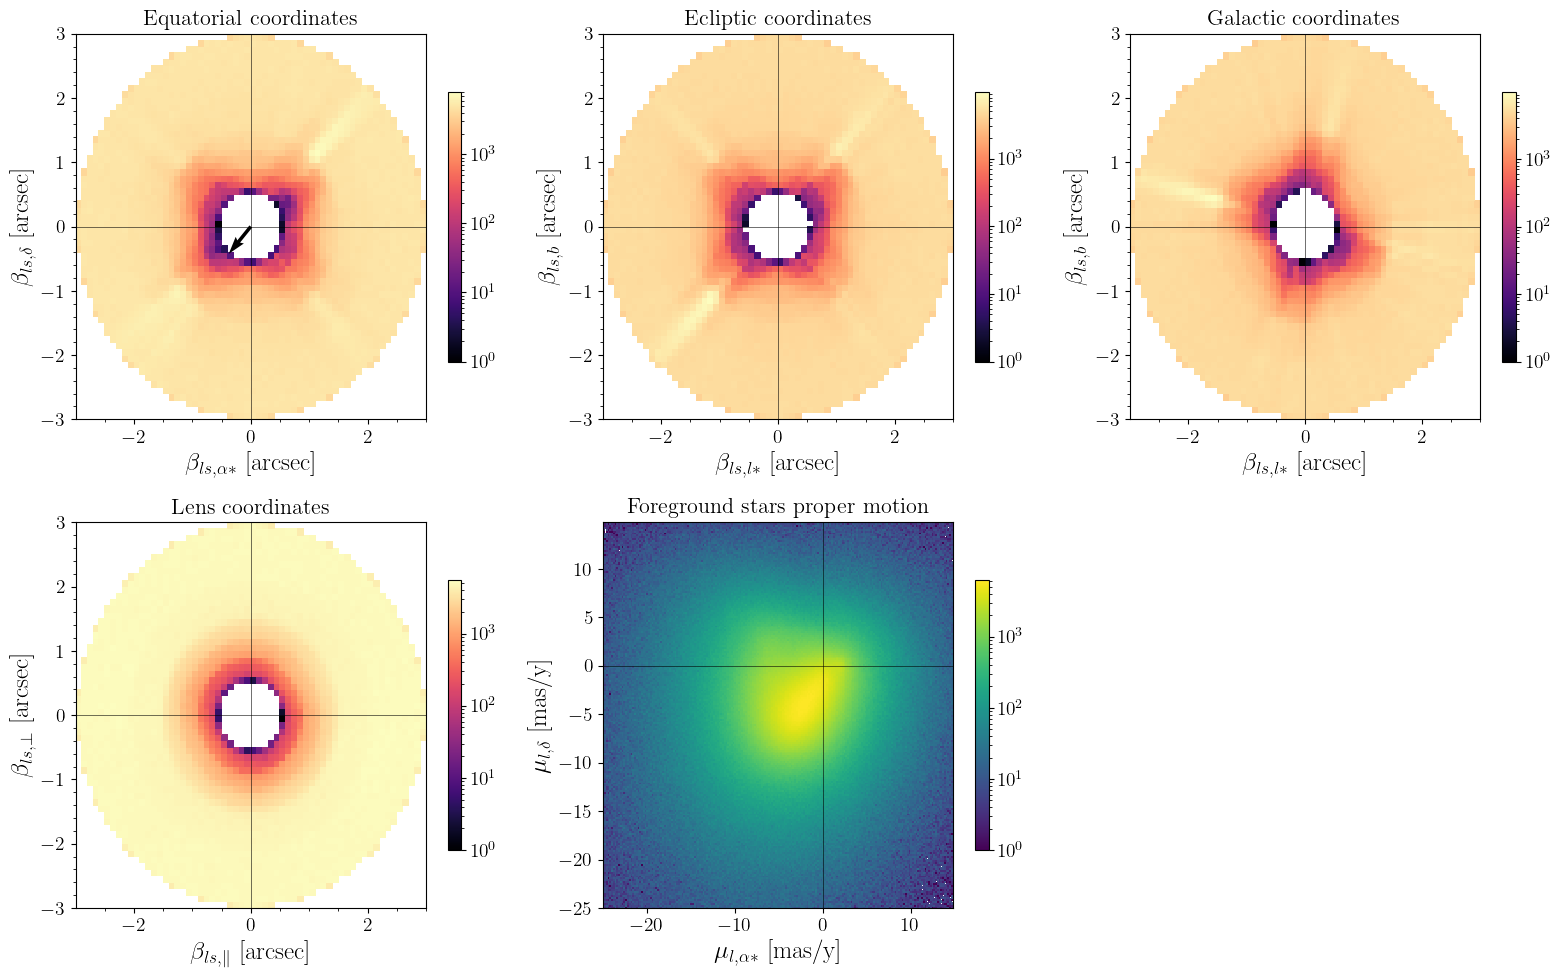

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,10))

list_max = [8128, 9819, 9980, 5490]
list_xlabel = [r'$\beta_{ls, \alpha*}$ [arcsec]', r'$\beta_{ls, l*}$ [arcsec]', r'$\beta_{ls, l*}$ [arcsec]', r'$\beta_{ls, \parallel}$ [arcsec]']
list_ylabel = [r'$\beta_{ls, \delta}$ [arcsec]', r'$\beta_{ls, b}$ [arcsec]', r'$\beta_{ls, b}$ [arcsec]', r'$\beta_{ls, \perp}$ [arcsec]']
list_title = ['Equatorial coordinates', 'Ecliptic coordinates', 'Galactic coordinates', 'Lens coordinates']

for i in range(3):
    aa = ax[0][i].hist2d(x[i], y[i], bins=[bins, bins], weights=counts[i],
                         norm=colors.LogNorm(vmin=1, vmax=list_max[i]), cmap='magma') 

    fig.colorbar(aa[3], ax=ax[0][i], shrink=0.7)
    print(np.max(aa[0][aa[0]>0]))
    
    ax[0][i].set_xlabel(list_xlabel[i], fontsize=18); ax[0][i].set_ylabel(list_ylabel[i], fontsize=18)
    ax[0][i].minorticks_on()
    ax[0][i].hlines(0, -3, 3, colors='k', linestyles='solid', linewidth=0.4) 
    ax[0][i].vlines(0, -3, 3, colors='k', linestyles='solid', linewidth=0.4)
    ax[0][i].set_title(list_title[i], fontsize=16)

ax[0][0].quiver(0, 0, mean_pml_hat[0], mean_pml_hat[1], color='k', scale=10, width=0.01)

aa = ax[1][0].hist2d(x[3], y[3], bins=[bins, bins], weights=counts[3],
                     norm=colors.LogNorm(vmin=1, vmax=list_max[3]), cmap='magma') 

fig.colorbar(aa[3], ax=ax[1][0], shrink=0.7)
print(np.max(aa[0][aa[0]>0]))

ax[1][0].set_xlabel(list_xlabel[3], fontsize=18); ax[1][0].set_ylabel(list_ylabel[3], fontsize=18)
ax[1][0].minorticks_on()
ax[1][0].hlines(0, -3, 3, colors='k', linestyles='solid', linewidth=0.4) 
ax[1][0].vlines(0, -3, 3, colors='k', linestyles='solid', linewidth=0.4)
ax[1][0].set_title(list_title[3], fontsize=16)


aa = ax[1][1].hist2d(vl_vec[:, 0], vl_vec[:, 1], bins=[np.arange(-25,15,0.2), np.arange(-25,15,0.2)], range=None, density=False, weights=None, 
                  norm=colors.LogNorm(vmin=1, vmax=6215.0)) 
fig.colorbar(aa[3], ax=ax[1][1], shrink=0.7)
ax[1][1].hlines(0, -30, 30, colors='k', linestyles='solid', linewidth=0.4) 
ax[1][1].vlines(0, -30, 30, colors='k', linestyles='solid', linewidth=0.4)
print(np.max(aa[0][aa[0]>0]))

ax[1][1].set_xlabel(r'$\mu_{l,\alpha*}$ [mas/y]', fontsize=18); ax[1][1].set_ylabel(r'$\mu_{l,\delta}$ [mas/y]', fontsize=18);
ax[1][1].set_title(r'Foreground stars proper motion', fontsize=16)

ax[1][2].set_visible(False)

fig.tight_layout()
#fig.savefig(FigDir+'bg_star_anisotropy.png')

8128.0
9819.0
9980.0


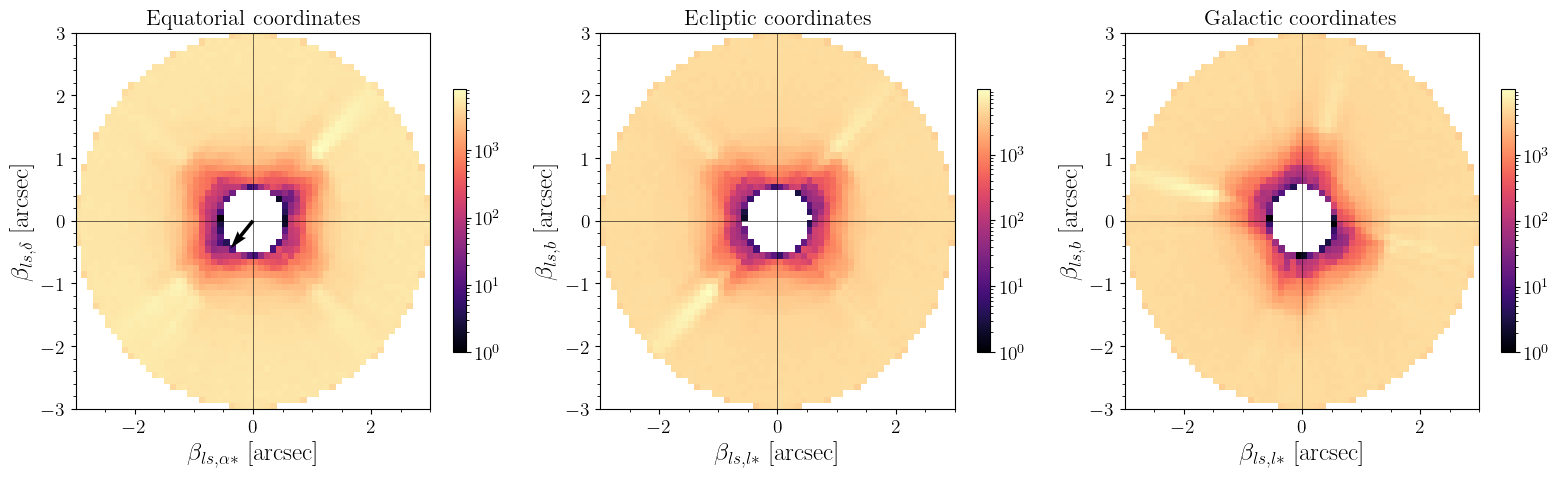

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

list_max = [8128, 9819, 9980, 5490]
list_xlabel = [r'$\beta_{ls, \alpha*}$ [arcsec]', r'$\beta_{ls, l*}$ [arcsec]', r'$\beta_{ls, l*}$ [arcsec]', r'$\beta_{ls, \parallel}$ [arcsec]']
list_ylabel = [r'$\beta_{ls, \delta}$ [arcsec]', r'$\beta_{ls, b}$ [arcsec]', r'$\beta_{ls, b}$ [arcsec]', r'$\beta_{ls, \perp}$ [arcsec]']
list_title = ['Equatorial coordinates', 'Ecliptic coordinates', 'Galactic coordinates', 'Lens coordinates']

for i in range(3):
    aa = ax[i].hist2d(x[i], y[i], bins=[bins, bins], weights=counts[i],
                      norm=colors.LogNorm(vmin=1, vmax=list_max[i]), cmap='magma') 

    fig.colorbar(aa[3], ax=ax[i], shrink=0.7)
    print(np.max(aa[0][aa[0]>0]))
    
    ax[i].set_xlabel(list_xlabel[i], fontsize=18); ax[i].set_ylabel(list_ylabel[i], fontsize=18)
    ax[i].minorticks_on()
    ax[i].hlines(0, -3, 3, colors='k', linestyles='solid', linewidth=0.4) 
    ax[i].vlines(0, -3, 3, colors='k', linestyles='solid', linewidth=0.4)
    ax[i].set_title(list_title[i], fontsize=16)

ax[0].quiver(0, 0, mean_pml_hat[0], mean_pml_hat[1], color='k', scale=10, width=0.01)

fig.tight_layout()
fig.savefig(FigDir+'bg_star_anisotropy_1.png')

5490.0
6215.0


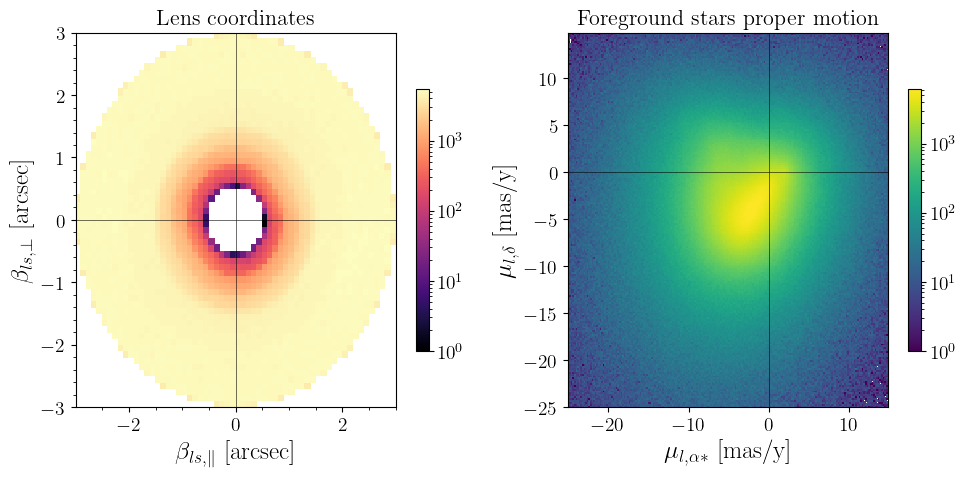

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

aa = ax[0].hist2d(x[3], y[3], bins=[bins, bins], weights=counts[3],
                  norm=colors.LogNorm(vmin=1, vmax=list_max[3]), cmap='magma') 

fig.colorbar(aa[3], ax=ax[0], shrink=0.7)
print(np.max(aa[0][aa[0]>0]))

ax[0].set_xlabel(list_xlabel[3], fontsize=18); ax[0].set_ylabel(list_ylabel[3], fontsize=18)
ax[0].minorticks_on()
ax[0].hlines(0, -3, 3, colors='k', linestyles='solid', linewidth=0.4) 
ax[0].vlines(0, -3, 3, colors='k', linestyles='solid', linewidth=0.4)
ax[0].set_title(list_title[3], fontsize=16)


aa = ax[1].hist2d(vl_vec[:, 0], vl_vec[:, 1], bins=[np.arange(-25,15,0.2), np.arange(-25,15,0.2)], range=None, density=False, weights=None, 
                  norm=colors.LogNorm(vmin=1, vmax=6215.0)) 
fig.colorbar(aa[3], ax=ax[1], shrink=0.7)
ax[1].hlines(0, -30, 30, colors='k', linestyles='solid', linewidth=0.4) 
ax[1].vlines(0, -30, 30, colors='k', linestyles='solid', linewidth=0.4)
print(np.max(aa[0][aa[0]>0]))

ax[1].set_xlabel(r'$\mu_{l,\alpha*}$ [mas/y]', fontsize=18); ax[1].set_ylabel(r'$\mu_{l,\delta}$ [mas/y]', fontsize=18);
ax[1].set_title(r'Foreground stars proper motion', fontsize=16)

fig.tight_layout()
fig.savefig(FigDir+'bg_star_anisotropy_2.png')

### Lenses with astrophysical parameters

In [17]:
# read in the astrophysical parameters for the foreground stars (a subset of the full sample has astro params)
df_fore_params = pd.read_csv(DataDir+'fg_params.csv') 

In [18]:
# add astrophysical parameters to the foreground stars
df_fore = df_fore.merge(df_fore_params, how='left', on='source_id', validate='many_to_one')
df_fore.head()

,source_id,ra,dec,pmra,pmdec,l,b,mass,mass_lower,mass_upper,lum,lum_lower,lum_upper,teff,teff_lower,teff_upper,mg,mg_lower,mg_upper
0,200427470665898112,76.130394,39.222123,-0.374506,-3.049042,166.727101,-1.247711,NaN,NaN,NaN,0.430176,0.396672,0.490564,4884.6343,4736.7695,4940.7170,5.8188,5.7304,5.8941
1,200427711181020928,76.101224,39.239983,8.761902,-2.793202,166.699189,-1.254839,NaN,NaN,NaN,NaN,NaN,NaN,3745.7334,3654.5570,3793.7205,9.7425,9.4261,9.9665
2,200454099459500032,76.275385,39.420701,-2.659706,-26.709012,166.637064,-1.038162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200457226196149248,76.576459,39.450735,-7.590164,4.000013,166.753570,-0.834686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200466812565980416,76.196052,39.465721,0.725715,-3.046217,166.564123,-1.059649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
rows_wmass = ~df_fore['mass'].isna() 
df_fore = df_fore[rows_wmass]
df_back = df_back[rows_wmass]
len(df_back)

2081583

In [21]:
# compute ecliptic coordinates
df_back['ecl_lon'], df_back['ecl_lat'] = fn_eq_to_ecl_array(df_back['ra'].to_numpy(), df_back['dec'].to_numpy())
df_fore['ecl_lon'], df_fore['ecl_lat'] = fn_eq_to_ecl_array(df_fore['ra'].to_numpy(), df_fore['dec'].to_numpy())

In [22]:
# angular impact parameter 
b_il = np.zeros((4, len(df_back), 2))

b_il[0] = fn_angular_sep(df_back['ra'].to_numpy()*degree, df_back['dec'].to_numpy()*degree, df_fore['ra'].to_numpy()*degree, df_fore['dec'].to_numpy()*degree)
b_il[1] = fn_angular_sep(df_back['ecl_lon'].to_numpy()*degree, df_back['ecl_lat'].to_numpy()*degree, df_fore['ecl_lon'].to_numpy()*degree, df_fore['ecl_lat'].to_numpy()*degree)
b_il[2] = fn_angular_sep(df_back['l'].to_numpy()*degree, df_back['b'].to_numpy()*degree, df_fore['l'].to_numpy()*degree, df_fore['b'].to_numpy()*degree)

In [23]:
mean_pml = np.array([np.mean(df_fore['pmra'].to_numpy()), np.mean(df_fore['pmdec'].to_numpy())])
mean_pml_hat = mean_pml/np.sqrt(mean_pml[0]**2 + mean_pml[1]**2)
mean_pml_hat

array([-0.6139729, -0.7893271])

In [24]:
vl_vec = np.array([df_fore['pmra'].to_numpy() , df_fore['pmdec'].to_numpy()]).T

vl_norm = np.sqrt(vl_vec[:, 0]**2 + vl_vec[:, 1]**2)
vl_hat = np.array([vl_vec[:, 0]/vl_norm, vl_vec[:, 1]/vl_norm]).T 
vl_perp_hat = np.array([-vl_hat[:, 1], vl_hat[:, 0]]).T

b_il[3][:, 0] = b_il[0][:, 0]*vl_hat[:, 0] + b_il[0][:, 1]*vl_hat[:, 1]
b_il[3][:, 1] = b_il[0][:, 0]*vl_perp_hat[:, 0] + b_il[0][:, 1]*vl_perp_hat[:, 1]

In [25]:
# plot setup

x_min, x_max, delta_x = -3, 3, 0.1
bins=np.arange(x_min,x_max+delta_x,delta_x)
x, y, counts = np.zeros( (len(b_il), (len(bins)-1)**2) ), np.zeros( (len(b_il), (len(bins)-1)**2) ), np.zeros( (len(b_il), (len(bins)-1)**2) )

for i in range(len(b_il)):
    
    tmp_counts, tmp_x, tmp_y = np.histogram2d((b_il[i]/arcsec)[:, 0], (b_il[i]/arcsec)[:, 1], bins=[bins, bins])
    tmp_x, tmp_y = np.meshgrid(tmp_x[:-1], tmp_y[:-1])
    x[i] = tmp_x.flatten(); y[i] = tmp_y.flatten()
    counts[i] = tmp_counts.T.flatten()
    
    # mask pixels at the boundary
    counts[i][ np.sqrt( (x[i]+delta_x/2)**2 + (y[i]+delta_x/2)**2) > (x_max - delta_x/4) ] = np.nan

1220.0
1243.0
1243.0
1176.0
1179.0


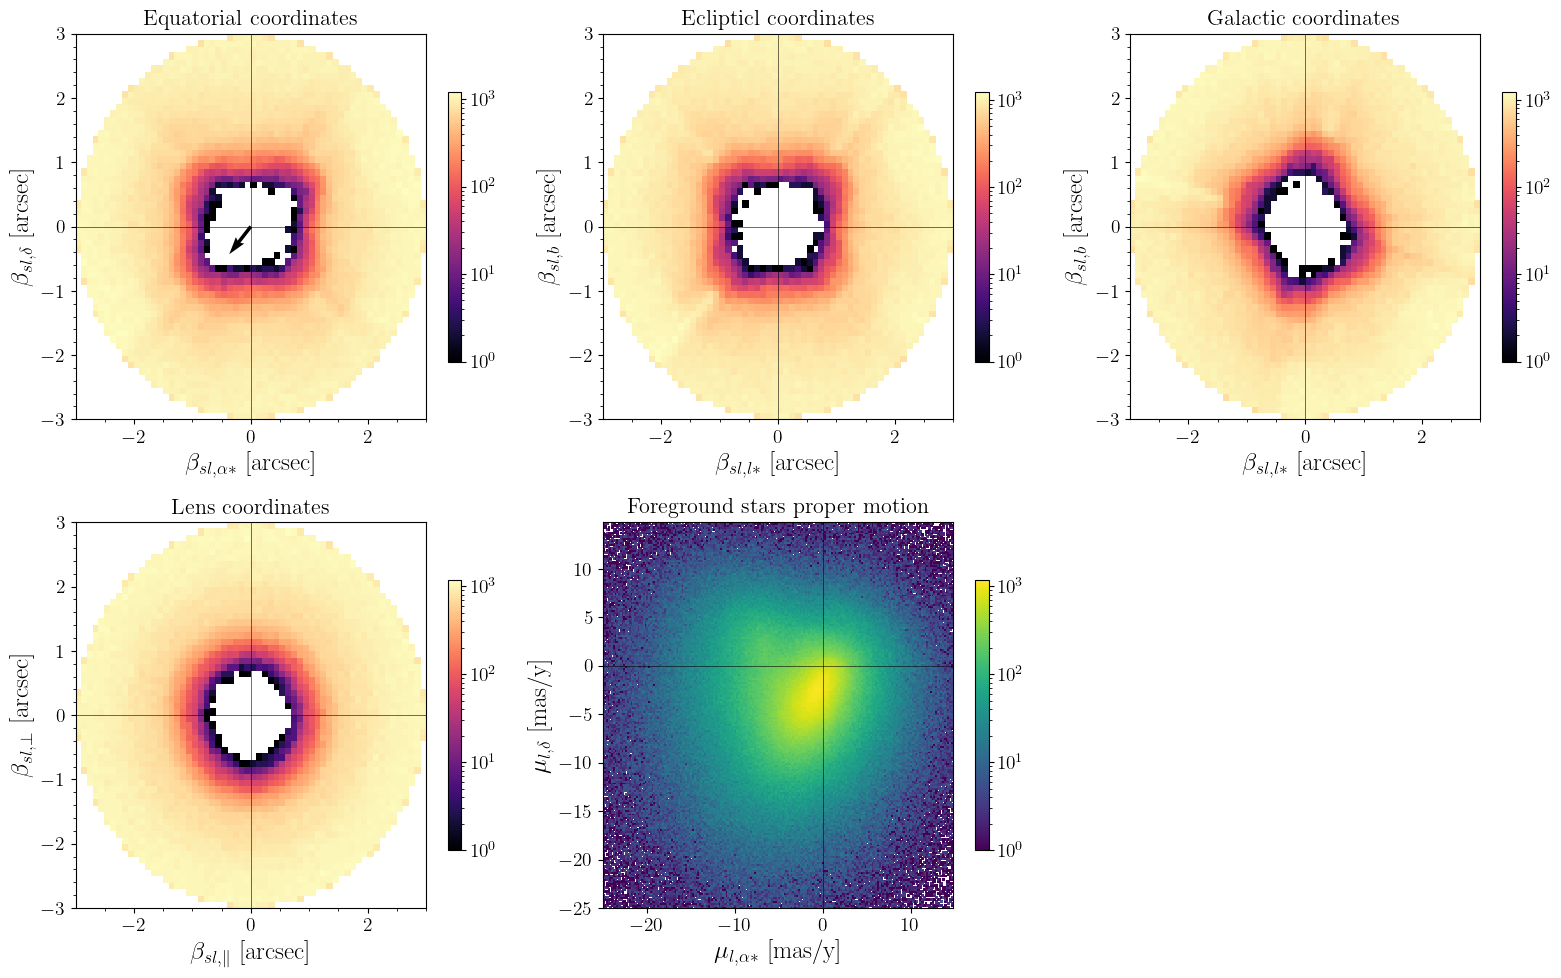

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,10))

list_max = [1220, 1243, 1243, 1176]
list_xlabel = [r'$\beta_{ls, \alpha*}$ [arcsec]', r'$\beta_{ls, l*}$ [arcsec]', r'$\beta_{ls, l*}$ [arcsec]', r'$\beta_{ls, \parallel}$ [arcsec]']
list_ylabel = [r'$\beta_{ls, \delta}$ [arcsec]', r'$\beta_{ls, b}$ [arcsec]', r'$\beta_{ls, b}$ [arcsec]', r'$\beta_{ls, \perp}$ [arcsec]']
list_title = ['Equatorial coordinates', 'Eclipticl coordinates', 'Galactic coordinates', 'Lens coordinates']

for i in range(3):
    aa = ax[0][i].hist2d(x[i], y[i], bins=[bins, bins], weights=counts[i],
                         norm=colors.LogNorm(vmin=1, vmax=list_max[i]), cmap='magma') 

    fig.colorbar(aa[3], ax=ax[0][i], shrink=0.7)
    print(np.max(aa[0][aa[0]>0]))
    
    ax[0][i].set_xlabel(list_xlabel[i], fontsize=18); ax[0][i].set_ylabel(list_ylabel[i], fontsize=18)
    ax[0][i].minorticks_on()
    ax[0][i].hlines(0, -3, 3, colors='k', linestyles='solid', linewidth=0.4) 
    ax[0][i].vlines(0, -3, 3, colors='k', linestyles='solid', linewidth=0.4)
    ax[0][i].set_title(list_title[i], fontsize=16)

ax[0][0].quiver(0, 0, mean_pml_hat[0], mean_pml_hat[1], color='k', scale=10, width=0.01)

aa = ax[1][0].hist2d(x[3], y[3], bins=[bins, bins], weights=counts[3],
                     norm=colors.LogNorm(vmin=1, vmax=list_max[3]), cmap='magma') 

fig.colorbar(aa[3], ax=ax[1][0], shrink=0.7)
print(np.max(aa[0][aa[0]>0]))

ax[1][0].set_xlabel(list_xlabel[3], fontsize=18); ax[1][0].set_ylabel(list_ylabel[3], fontsize=18)
ax[1][0].minorticks_on()
ax[1][0].hlines(0, -3, 3, colors='k', linestyles='solid', linewidth=0.4) 
ax[1][0].vlines(0, -3, 3, colors='k', linestyles='solid', linewidth=0.4)
ax[1][0].set_title(list_title[3], fontsize=16)


aa = ax[1][1].hist2d(vl_vec[:, 0], vl_vec[:, 1], bins=[np.arange(-25,15,0.2), np.arange(-25,15,0.2)], range=None, density=False, weights=None, 
                  norm=colors.LogNorm(vmin=1, vmax=1179.0)) 
fig.colorbar(aa[3], ax=ax[1][1], shrink=0.7)
ax[1][1].hlines(0, -30, 30, colors='k', linestyles='solid', linewidth=0.4) 
ax[1][1].vlines(0, -30, 30, colors='k', linestyles='solid', linewidth=0.4)
print(np.max(aa[0][aa[0]>0]))

ax[1][1].set_xlabel(r'$\mu_{l,\alpha*}$ [mas/y]', fontsize=18); ax[1][1].set_ylabel(r'$\mu_{l,\delta}$ [mas/y]', fontsize=18);
ax[1][1].set_title(r'Foreground stars proper motion', fontsize=16)

ax[1][2].set_visible(False)

fig.tight_layout()
#fig.savefig(FigDir+'bg_star_anisotropy_wparams.png')

# Effective dispersion plots

In [85]:
# read in the clean data files (after the ruwe and distance cuts)
df_fore = pd.read_csv(DataDir+'fg_subtracted.csv', usecols = ['ra', 'dec', 'dist_50'])
df_back = pd.read_csv(DataDir+'bg_subtracted.csv', usecols = ['ra', 'dec', 'pmra', 'pmdec','pmra_error', 'pmdec_error', 'pmra_pmdec_corr', 
                                                              'dist_50', 'phot_g_mean_mag', 'pmra_sub', 'pmdec_sub', 'pmra_eff_error', 'pmdec_eff_error', 'pmra_pmdec_eff_corr'])
len(df_back), len(df_fore)

(11690246, 11690246)

## As a function of background star G magnitude

In [51]:
bins = np.arange(13,22,0.1)
gmag_counts = np.histogram(df_back['phot_g_mean_mag'].to_numpy(), bins=bins)[0]

pm_error = np.histogram(df_back['phot_g_mean_mag'].to_numpy(), bins=bins, 
                        weights=np.sqrt(df_back['pmra_error'].to_numpy()**2 + df_back['pmdec_error'].to_numpy()**2 + 
                                        2*df_back['pmra_pmdec_corr'].to_numpy()*df_back['pmra_error'].to_numpy()*df_back['pmdec_error'].to_numpy()) )[0]
pm_error = np.divide(pm_error, gmag_counts, out=np.zeros(len(gmag_counts)), where=(gmag_counts>0) )

pm_eff_error = np.histogram(df_back['phot_g_mean_mag'].to_numpy(), bins=bins, 
                            weights=np.sqrt(df_back['pmra_eff_error'].to_numpy()**2 + df_back['pmdec_eff_error'].to_numpy()**2 +
                                            2*df_back['pmra_pmdec_eff_corr'].to_numpy()*df_back['pmra_eff_error'].to_numpy()*df_back['pmdec_eff_error'].to_numpy()) )[0]
pm_eff_error = np.divide(pm_eff_error, gmag_counts, out=np.zeros(len(gmag_counts)), where=(gmag_counts>0) )

<ipython-input-52-49b7ca9b6a30>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels);


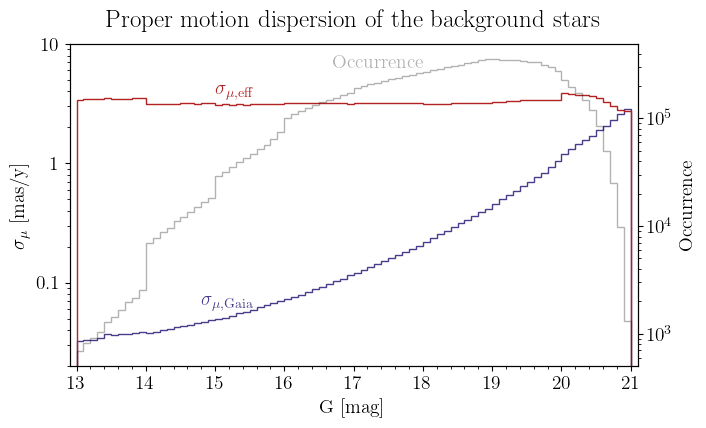

In [52]:
goldenratio = 1.61803
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5*goldenratio, 4.5))
colorlist = ['darkslateblue', 'firebrick', 'green', 'orange', 'black', 'purple']
fonts = 14
ax.minorticks_on()

ax.hist(bins[:-1], bins=bins, log=True, density=False, histtype='step', weights=pm_error, color=colorlist[0]);
ax.hist(bins[:-1], bins=bins, log=True, density=False, histtype='step', weights=pm_eff_error, color=colorlist[1]);

ax2 = ax.twinx()    
ax2.hist(bins[:-1], bins=bins, log=True, density=False, histtype='step', weights=gmag_counts, color='k', alpha=0.3)

ax.set_xlabel(r'G [mag]', fontsize = fonts); ax.set_ylabel(r'$\sigma_{\mu}$ [mas/y]', fontsize = fonts)
ax2.set_ylabel(r'Occurrence', fontsize = fonts)
ax.set_xlim(12.9, 21.1); ax.set_ylim(0.02, 10)

labels = [item.get_text() for item in ax.get_yticklabels()]
labels[2] = '$\\mathdefault{0.1}$'; labels[3] = '$\\mathdefault{1}$'; labels[4] = '$\\mathdefault{10}$'
ax.set_yticklabels(labels);

ax.set_title('Proper motion dispersion of the background stars ', fontsize = 18, pad=12)
ax.text(16.7, 6.3, 'Occurrence', color='k', alpha=0.3, fontsize = fonts)
ax.text(15, 3.8, r'$\sigma_{\mu, \mathrm{eff}}$', color=colorlist[1], fontsize = fonts)
ax.text(14.8, 0.065, r'$\sigma_{\mu, \mathrm{Gaia}}$', color=colorlist[0], fontsize = fonts)

fig.tight_layout()
#fig.savefig(FigDir+'eff_error_g.pdf')

## As a function of angular impact parameter


In [86]:
b_il = fn_angular_sep(df_back['ra'].to_numpy()*degree, df_back['dec'].to_numpy()*degree,
                      df_fore['ra'].to_numpy()*degree, df_fore['dec'].to_numpy()*degree)
b_il_norm = np.sqrt(b_il[:, 0]**2+b_il[:, 1]**2)/arcsec

In [87]:
bins = np.arange(0, 3, 0.05)
bil_counts = np.histogram(b_il_norm, bins=bins)[0]

pm_error = np.histogram(b_il_norm, bins=bins, 
                        weights=np.sqrt(df_back['pmra_error'].to_numpy()**2 + df_back['pmdec_error'].to_numpy()**2 + 
                                        2*df_back['pmra_pmdec_corr'].to_numpy()*df_back['pmra_error'].to_numpy()*df_back['pmdec_error'].to_numpy())  )[0]
pm_error = np.divide(pm_error, bil_counts, out=np.zeros(len(bil_counts)), where=(bil_counts>0) )

pm_eff_error = np.histogram(b_il_norm, bins=bins, 
                            weights=np.sqrt(df_back['pmra_eff_error'].to_numpy()**2 + df_back['pmdec_eff_error'].to_numpy()**2 +
                                            2*df_back['pmra_pmdec_eff_corr'].to_numpy()*df_back['pmra_eff_error'].to_numpy()*df_back['pmdec_eff_error'].to_numpy()) )[0]
pm_eff_error = np.divide(pm_eff_error, bil_counts, out=np.zeros(len(bil_counts)), where=(bil_counts>0))

<ipython-input-89-0e56b124a9bf>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels);


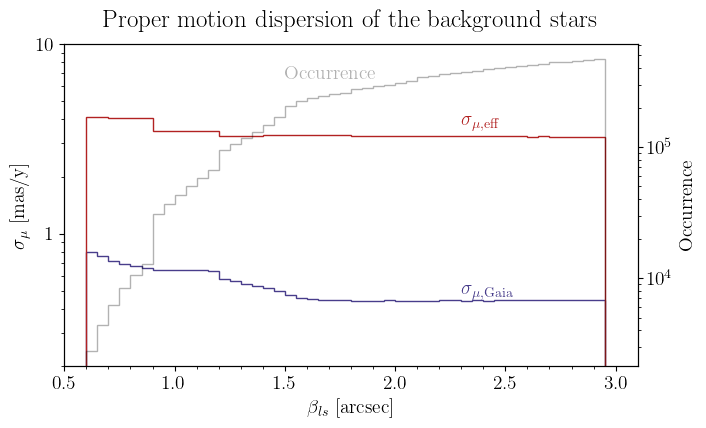

In [89]:
goldenratio = 1.61803
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5*goldenratio, 4.5))
colorlist = ['darkslateblue', 'firebrick', 'green', 'orange', 'black', 'purple']
fonts = 14
ax.minorticks_on()


ax.hist(bins[:-1], bins=bins, log=True, density=False, histtype='step', weights=pm_error, color=colorlist[0]);
ax.hist(bins[:-1], bins=bins, log=True, density=False, histtype='step', weights=pm_eff_error, color=colorlist[1]);

ax2 = ax.twinx()    
ax2.hist(bins[:-1], bins=bins, log=True, density=False, histtype='step', weights=bil_counts, color='k', alpha=0.3);

ax.set_xlabel(r'$\beta_{ls}$ [arcsec]', fontsize = fonts); ax.set_ylabel(r'$\sigma_{\mu}$ [mas/y]', fontsize = fonts)
ax2.set_ylabel(r'Occurrence', fontsize = fonts)
ax.set_xlim(0.5, 3.1); ax.set_ylim(0.2, 10)

labels = [item.get_text() for item in ax.get_yticklabels()]
labels[2] = '$\\mathdefault{1}$'; labels[3] = '$\\mathdefault{10}$'
ax.set_yticklabels(labels);


ax.set_title('Proper motion dispersion of the background stars ', fontsize = 18, pad=12)
ax.text(1.5, 6.5, 'Occurrence', color='k', alpha=0.3, fontsize = fonts)
ax.text(2.3, 3.7, r'$\sigma_{\mu, \mathrm{eff}}$', color=colorlist[1], fontsize = fonts)
ax.text(2.3, 0.48, r'$\sigma_{\mu, \mathrm{Gaia}}$', color=colorlist[0], fontsize = fonts)

fig.tight_layout()
fig.savefig(FigDir+'eff_error_b.pdf')

## As a function of background star distance



In [81]:
bins = np.arange(0,40,0.2)
dist_counts = np.histogram(df_back['dist_50'].to_numpy()/1000, bins=bins)[0]

pm_error = np.histogram(df_back['dist_50'].to_numpy()/1000, bins=bins, 
                        weights=np.sqrt(df_back['pmra_error'].to_numpy()**2 + df_back['pmdec_error'].to_numpy()**2 + 
                                        2*df_back['pmra_pmdec_corr'].to_numpy()*df_back['pmra_error'].to_numpy()*df_back['pmdec_error'].to_numpy()) )[0]
pm_error = np.divide(pm_error, dist_counts, out=np.zeros(len(dist_counts)), where=(dist_counts>0) )

pm_eff_error = np.histogram(df_back['dist_50'].to_numpy()/1000, bins=bins, 
                            weights=np.sqrt(df_back['pmra_eff_error'].to_numpy()**2 + df_back['pmdec_eff_error'].to_numpy()**2 +
                                            2*df_back['pmra_pmdec_eff_corr'].to_numpy()*df_back['pmra_eff_error'].to_numpy()*df_back['pmdec_eff_error'].to_numpy()) )[0]
pm_eff_error = np.divide(pm_eff_error, dist_counts, out=np.zeros(len(dist_counts)), where=(dist_counts>0) )

<ipython-input-91-a4ed37bb58c7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels);


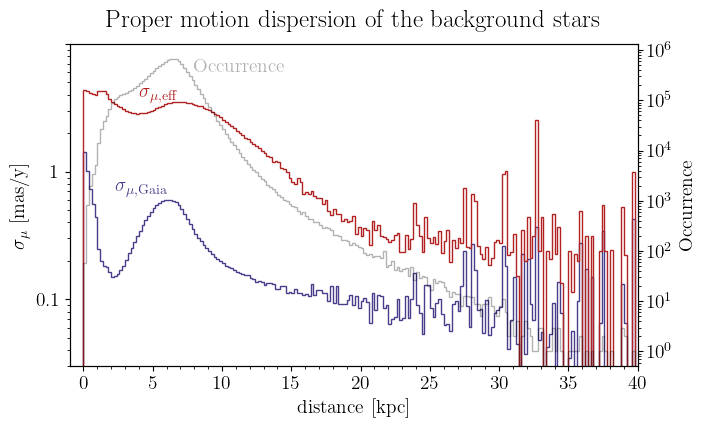

In [91]:
goldenratio = 1.61803
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5*goldenratio, 4.5))
colorlist = ['darkslateblue', 'firebrick', 'green', 'orange', 'black', 'purple']
fonts = 14
ax.minorticks_on()


ax.hist(bins[:-1], bins=bins, log=True, density=False, histtype='step', weights=pm_error, color=colorlist[0]);
ax.hist(bins[:-1], bins=bins, log=True, density=False, histtype='step', weights=pm_eff_error, color=colorlist[1]);

ax2 = ax.twinx()    
ax2.hist(bins[:-1], bins=bins, log=True, density=False, histtype='step', weights=dist_counts, color='k', alpha=0.3);

ax.set_xlabel(r'distance [kpc]', fontsize = fonts); ax.set_ylabel(r'$\sigma_{\mu}$ [mas/y]', fontsize = fonts)
ax2.set_ylabel(r'Occurrence', fontsize = fonts)
ax.set_xlim(-1, 40); ax.set_ylim(0.03, 10)

labels = [item.get_text() for item in ax.get_yticklabels()]
labels[2] = '$\\mathdefault{0.1}$'; labels[3] = '$\\mathdefault{1}$'
ax.set_yticklabels(labels);


ax.set_title('Proper motion dispersion of the background stars ', fontsize = 18, pad=12)
ax.text(8, 6, 'Occurrence', color='k', alpha=0.3, fontsize = fonts)
ax.text(4, 3.8, r'$\sigma_{\mu, \mathrm{eff}}$', color=colorlist[1], fontsize = fonts)
ax.text(2.3, 0.7, r'$\sigma_{\mu, \mathrm{Gaia}}$', color=colorlist[0], fontsize = fonts)

fig.tight_layout()
#fig.savefig(FigDir+'eff_error_b.pdf')

# Proper motion template plots

## Compute the list of tau values and their normalization

In [11]:
from template import Template 

In [12]:
# read in the clean data files (after the ruwe and distance cuts)
df_fore = pd.read_csv(DataDir+'fg_subtracted.csv', usecols = ['ra', 'dec', 'pmra', 'pmdec','pmra_error', 'pmdec_error', 'dist_50'])
df_back = pd.read_csv(DataDir+'bg_subtracted.csv', usecols = ['ra', 'dec', 'pmra', 'pmdec','pmra_error', 'pmdec_error', 'dist_50', 'pmra_sub', 'pmdec_sub', 'pmra_eff_error', 'pmdec_eff_error', 'pmra_pmdec_eff_corr'])
len(df_back), len(df_fore)

(11690246, 11690246)

In [13]:
# create an instance of the class Template 
tau = Template(template_type='proper motion', matched_filter='dipole', rot_angle=0, observation_t=2.833*Year)

# compute the proper motion template
tau_mu, norm_sq, template_cond = tau.template_mu(df_fore, df_back, return_list=True)
tau_mu = tau_mu[template_cond]; norm_sq = norm_sq[template_cond]

In [14]:
df_fore = df_fore.iloc[template_cond]
df_back = df_back.iloc[template_cond]

## Plot SNR as a function of foreground stars distance and angular impact parameter

In [113]:
sigma_mu = np.sqrt(df_back['pmra_eff_error'].to_numpy()**2 + df_back['pmdec_eff_error'].to_numpy()**2 + 
                   2*df_back['pmra_pmdec_eff_corr'].to_numpy()*df_back['pmra_eff_error'].to_numpy()*df_back['pmdec_eff_error'].to_numpy() )

In [114]:
np.min(df_fore['dist_50'].to_numpy()), np.max(df_fore['dist_50'].to_numpy())

(9.854347, 14208.889)

In [98]:
# compute tau, the normalization and the effective error binning the pairs based on the foreground stars distance
fore_dist = df_fore['dist_50'].to_numpy()
dist_bins = np.logspace(0.99, 4.2, num=15)

dist_counts = np.histogram(fore_dist, bins=dist_bins)[0]

tau_hist = np.histogram(fore_dist, bins=dist_bins, weights=tau_mu )[0]
nsq_hist = np.histogram(fore_dist, bins=dist_bins, weights=norm_sq )[0]
sigmamu_dist_hist = np.histogram(fore_dist, bins=dist_bins, weights=sigma_mu )[0]
sigmamu_dist_hist = np.divide(sigmamu_dist_hist, dist_counts, out=np.zeros(len(dist_counts)), where=(dist_counts>0)) 

In [115]:
# compute tau, the normalization and the effective error binning the pairs based on the angular impact parameter
bil = fn_angular_sep(df_back['ra'].to_numpy()*degree, df_back['dec'].to_numpy()*degree,
                     df_fore['ra'].to_numpy()*degree, df_fore['dec'].to_numpy()*degree)
bil_norm = np.sqrt(bil[:, 0]**2+bil[:, 1]**2)/arcsec
bins_bil = np.arange(0.6, 3.2, 0.2)

bil_counts = np.histogram(bil_norm, bins=bins_bil)[0]

tau_bil_hist = np.histogram(bil_norm, bins=bins_bil, weights=tau_mu )[0]
nsq_bil_hist = np.histogram(bil_norm, bins=bins_bil, weights=norm_sq )[0]
sigmamu_bil_hist = np.histogram(bil_norm, bins=bins_bil, weights=sigma_mu )[0]
sigmamu_bil_hist = np.divide(sigmamu_bil_hist, bil_counts, out=np.zeros(len(bil_counts)), where=(bil_counts>0)) 

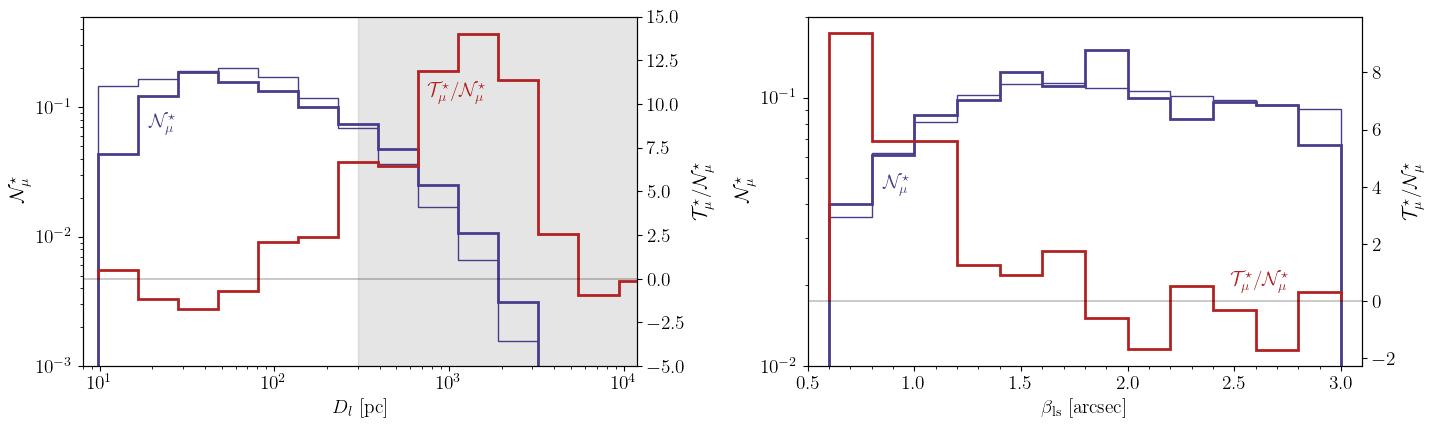

In [100]:
goldenratio = 1.61803
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9*goldenratio, 4.5))
colorlist = ['darkslateblue', 'firebrick', 'green', 'orange', 'black', 'purple']
fonts = 14

ax[0].minorticks_on()
ax[0].hist(dist_bins[:-1], bins=dist_bins, log=True, density=False, histtype='step', weights=np.sqrt(nsq_hist), color=colorlist[0], linewidth=2);
ax[0].hist(dist_bins[:-1], bins=dist_bins, log=True, density=False, histtype='step', weights=14*np.sqrt(dist_counts)/dist_bins[:-1]**2/sigmamu_dist_hist, color=colorlist[0], linewidth=1);
ax[0].set_xlim(8, 1.2E4); ax[0].set_ylim(1E-3,0.5)

ax2 = ax[0].twinx()    
ax2.hist(dist_bins[:-1], bins=dist_bins, log=False, density=False, histtype='step', weights=tau_hist/np.sqrt(nsq_hist), color=colorlist[1], linewidth=2)
ax2.axhline(0, 0,1, linewidth=0.3, color='k')
ax2.set_ylim(-5,15)

ax2.set_ylabel(r'$\mathcal{T}^{\star}_{\mu}/\mathcal{N}^{\star}_{\mu}$', fontsize = fonts)
ax[0].set_ylabel(r'$\mathcal{N}^{\star}_{\mu}$', fontsize = fonts)
ax[0].set_xlabel(r'$D_l$ [pc]', fontsize = fonts)

ax[0].text(750, 0.12, r'$\mathcal{T}^{\star}_{\mu}/\mathcal{N}^{\star}_{\mu}$', color=colorlist[1], fontsize = fonts)
ax[0].text(19, 0.07, r'$\mathcal{N}^{\star}_{\mu}$', color=colorlist[0], fontsize = fonts)
ax[0].fill_betweenx([1e-3,1], x1=[300, 300], x2=[15000, 15000], color='gray', alpha=0.2)

#fill_betweenx(y, x1, x2=0

ax[0].set_xscale('log')

ax[1].minorticks_on()
ax[1].hist(bins_bil[:-1], bins=bins_bil, log=True, density=False, histtype='step', weights=np.sqrt(nsq_bil_hist), color=colorlist[0], linewidth=2);
ax[1].hist(bins_bil[:-1], bins=bins_bil, log=True, density=False, histtype='step', weights=6E-4*np.sqrt(bil_counts)/(bins_bil[:-1])/sigmamu_bil_hist, color=colorlist[0], linewidth=1);
ax[1].set_xlim(0.5, 3.1); ax[1].set_ylim(1E-2,0.2)

ax2 = ax[1].twinx()    
ax2.hist(bins_bil[:-1], bins=bins_bil, log=False, density=False, histtype='step', weights=tau_bil_hist/np.sqrt(nsq_bil_hist), color=colorlist[1], linewidth=2)
ax2.axhline(0, 0,1, linewidth=0.3, color='k')

ax2.set_ylabel(r'$\mathcal{T}^{\star}_{\mu}/\mathcal{N}^{\star}_{\mu}$', fontsize = fonts)
ax[1].set_ylabel(r'$\mathcal{N}^{\star}_{\mu}$', fontsize = fonts)
ax[1].set_xlabel(r'$\beta_{\rm{ls}}$ [arcsec]', fontsize = fonts)

ax[1].text(2.48, 0.02, r'$\mathcal{T}^{\star}_{\mu}/\mathcal{N}^{\star}_{\mu}$', color=colorlist[1], fontsize = fonts)
ax[1].text(0.85, 0.046, r'$\mathcal{N}^{\star}_{\mu}$', color=colorlist[0], fontsize = fonts)

fig.tight_layout()
fig.savefig(FigDir+'starstar_tau_histo.pdf')

## Plot SNR as a function of foreground and background stars distances (2d histogram)

In [177]:
# compute tau, the normalization and the effective error binning the pairs based on the foreground stars distance
dist_cut = 300
fore_dist = df_fore['dist_50'].to_numpy()
back_dist = df_back['dist_50'].to_numpy()
step = (np.log10(dist_cut)-np.log10(np.min(fore_dist)))/7
fore_dist_bins = 10**np.arange(np.log10(np.min(fore_dist)), np.log10(np.max(fore_dist))+step, step)
back_dist_bins = np.logspace(1.9, 4.65, num=15)

counts, x, y = np.histogram2d(fore_dist, back_dist, bins=[fore_dist_bins, back_dist_bins])
norm_sq_histo, x, y = np.histogram2d(fore_dist, back_dist, bins=[fore_dist_bins, back_dist_bins], weights=norm_sq)
tau_mu_histo, x, y = np.histogram2d(fore_dist, back_dist, bins=[fore_dist_bins, back_dist_bins], weights=tau_mu)
x, y = np.meshgrid(x[:-1], y[:-1])
x = x.flatten(); y = y.flatten()

counts = counts.T.flatten()
norm_sq_histo = norm_sq_histo.T.flatten()
norm_sq_histo[norm_sq_histo==0] = np.nan
tau_mu_histo = tau_mu_histo.T.flatten()
ratio_histo = np.divide(tau_mu_histo, np.sqrt(norm_sq_histo), where=(norm_sq_histo>0), out=np.nan*np.zeros(len(tau_mu_histo)))

In [113]:
sigma_mu = np.sqrt(df_back['pmra_eff_error'].to_numpy()**2 + df_back['pmdec_eff_error'].to_numpy()**2 + 
                   2*df_back['pmra_pmdec_eff_corr'].to_numpy()*df_back['pmra_eff_error'].to_numpy()*df_back['pmdec_eff_error'].to_numpy() )

In [178]:
# compute tau, the normalization and the effective error binning the pairs based on the angular impact parameter
bil = fn_angular_sep(df_back['ra'].to_numpy()*degree, df_back['dec'].to_numpy()*degree,
                     df_fore['ra'].to_numpy()*degree, df_fore['dec'].to_numpy()*degree)
bil_norm = np.sqrt(bil[:, 0]**2+bil[:, 1]**2)/arcsec
bins_bil = np.arange(0.6, 3.2, 0.2)

bil_counts = np.histogram(bil_norm, bins=bins_bil)[0]

tau_bil_hist = np.histogram(bil_norm, bins=bins_bil, weights=tau_mu )[0]
nsq_bil_hist = np.histogram(bil_norm, bins=bins_bil, weights=norm_sq )[0]
sigmamu_bil_hist = np.histogram(bil_norm, bins=bins_bil, weights=sigma_mu )[0]
sigmamu_bil_hist = np.divide(sigmamu_bil_hist, bil_counts, out=np.zeros(len(bil_counts)), where=(bil_counts>0)) 

0.12955601113603596
12.065960374103442


<ipython-input-180-0c40a53eb156>:12: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  aa = ax[1].hist2d(x, y, bins=[fore_dist_bins, back_dist_bins], norm=SymLogNorm(linthresh=0.1, linscale=0.1, vmin=-np.nanmax(ratio_histo), vmax=np.nanmax(ratio_histo)),


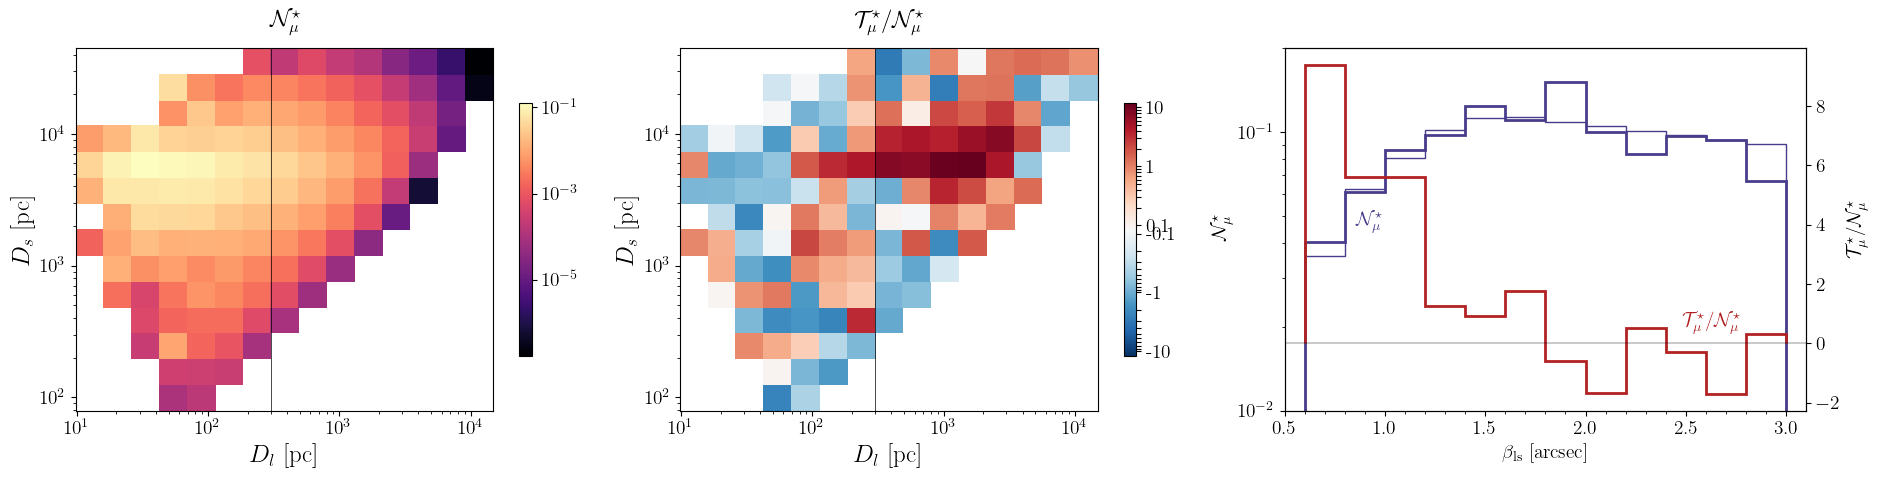

In [180]:
goldenratio = 1.61803
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(19, 5))
colorlist = ['darkslateblue', 'firebrick', 'green', 'orange', 'black', 'purple']
fonts = 14

aa = ax[0].hist2d(x, y, bins=[fore_dist_bins, back_dist_bins], norm=colors.LogNorm(vmin=np.nanmin(np.sqrt(norm_sq_histo)), vmax=np.nanmax(np.sqrt(norm_sq_histo))), weights=np.sqrt(norm_sq_histo), cmap='magma') 
fig.colorbar(aa[3], ax=ax[0], shrink=0.7, pad=0.05)
print(np.max(aa[0][aa[0]>0]))
ax[0].set_title(r'$\mathcal{N}^{\star}_{\mu}$', pad=15)
ax[0].axvline(dist_cut,0,1, c='k', linewidth=0.5)

aa = ax[1].hist2d(x, y, bins=[fore_dist_bins, back_dist_bins], norm=SymLogNorm(linthresh=0.1, linscale=0.1, vmin=-np.nanmax(ratio_histo), vmax=np.nanmax(ratio_histo)), 
                  weights=ratio_histo, cmap='RdBu_r') 

ticks = np.concatenate((np.linspace(-10, -1, 9, endpoint=False), 0.1*np.linspace(-10, -1, 10, endpoint=True), 
                     0.1*np.linspace(1, 10, 10, endpoint=True), np.linspace(2, 10, 9, endpoint=True)))
cbar = fig.colorbar(aa[3], ax=ax[1], shrink=0.7, ticks=ticks, pad=0.05)
cbar.ax.set_yticklabels(["{:.0f}".format(i) if i in [-10, -1, 1, 10] else "{:.1f}".format(i) if i in [-0.1, 0.1] else '' for i in ticks]) # add the labels

print(np.max(aa[0][aa[0]>0]))
ax[1].set_title(r'$\mathcal{T}^{\star}_{\mu}/\mathcal{N}^{\star}_{\mu}$', pad=15)
ax[1].axvline(dist_cut,0,1, c='k', linewidth=0.5)

for i in range(2):
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlabel(r'$D_l\ [\rm{pc}]$', fontsize=18); ax[i].set_ylabel(r'$D_s\ [\rm{pc}]$', fontsize=18);


ax[2].minorticks_on()
ax[2].hist(bins_bil[:-1], bins=bins_bil, log=True, density=False, histtype='step', weights=np.sqrt(nsq_bil_hist), color=colorlist[0], linewidth=2);
ax[2].hist(bins_bil[:-1], bins=bins_bil, log=True, density=False, histtype='step', weights=6E-4*np.sqrt(bil_counts)/(bins_bil[:-1])/sigmamu_bil_hist, color=colorlist[0], linewidth=1);
ax[2].set_xlim(0.5, 3.1); ax[2].set_ylim(1E-2,0.2)

ax2 = ax[2].twinx()    
ax2.hist(bins_bil[:-1], bins=bins_bil, log=False, density=False, histtype='step', weights=tau_bil_hist/np.sqrt(nsq_bil_hist), color=colorlist[1], linewidth=2)
ax2.axhline(0, 0,1, linewidth=0.3, color='k')

ax2.set_ylabel(r'$\mathcal{T}^{\star}_{\mu}/\mathcal{N}^{\star}_{\mu}$', fontsize = fonts)
ax[2].set_ylabel(r'$\mathcal{N}^{\star}_{\mu}$', fontsize = fonts)
ax[2].set_xlabel(r'$\beta_{\rm{ls}}$ [arcsec]', fontsize = fonts)

ax[2].text(2.48, 0.02, r'$\mathcal{T}^{\star}_{\mu}/\mathcal{N}^{\star}_{\mu}$', color=colorlist[1], fontsize = fonts)
ax[2].text(0.85, 0.046, r'$\mathcal{N}^{\star}_{\mu}$', color=colorlist[0], fontsize = fonts)
    


fig.tight_layout()
fig.savefig(FigDir+'starstar_snr_histo.pdf')

# Lenses with astrophysical parameters

In [208]:
# read in the clean data files (after the ruwe and distance cuts)
df_fore = pd.read_csv(DataDir+'fg_subtracted.csv', usecols = ['source_id', 'ra', 'dec', 'dist_50'])
df_back = pd.read_csv(DataDir+'bg_subtracted.csv', usecols = ['ra', 'dec'])
len(df_back), len(df_fore)

(11690246, 11690246)

In [210]:
# read in the astrophysical parameters for the foreground stars (a subset of the full sample has astro params)
df_fore_params = pd.read_csv(DataDir+'fg_params.csv') 

In [211]:
# add astrophysical parameters to the foreground stars
df_fore = df_fore.merge(df_fore_params, how='left', on='source_id', validate='many_to_one')

In [184]:
# angular impact parameter 
b_il = fn_angular_sep(df_back['ra'].to_numpy()*degree, df_back['dec'].to_numpy()*degree, df_fore['ra'].to_numpy()*degree, df_fore['dec'].to_numpy()*degree)
b_il_norm = np.sqrt( b_il[:, 0]**2 + b_il[:, 1]**2 )/arcsec

In [185]:
rows_wmass = ~df_fore['mass'].isna() 
rows_wlum = ~df_fore['lum'].isna() 

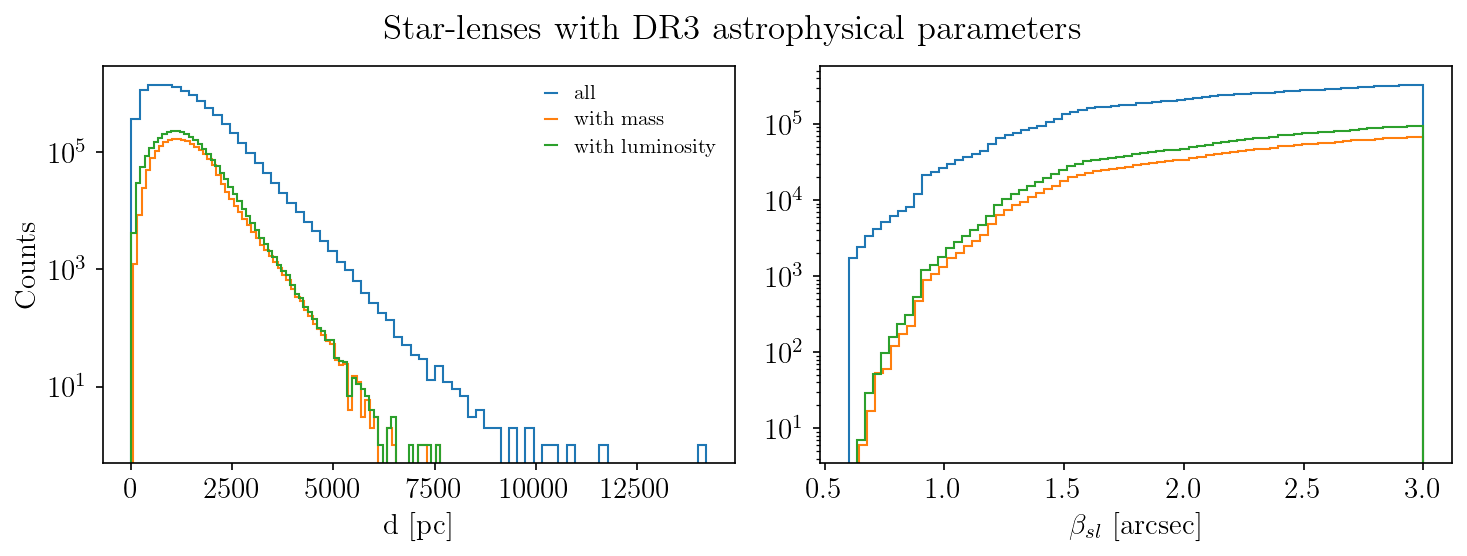

In [55]:
fig,ax = plt.subplots(1,2,figsize=(10,4), dpi = 150)
color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig.suptitle('Star-lenses with DR3 astrophysical parameters', y=0.93)

custom_lines = [mpl.lines.Line2D([0], [0], c=color_list[0], lw=1, label='all'),
                mpl.lines.Line2D([0], [0], c=color_list[1], lw=1, label='with mass'),
                mpl.lines.Line2D([0], [0], c=color_list[2], lw=1, label='with luminosity')]

ax[0].hist(df_fore['dist_50'].to_numpy(), bins=70, log=True, density=False, histtype='step', label='all');
ax[0].hist(df_fore[rows_wmass]['dist_50'].to_numpy(), bins=70, log=True, density=False, histtype='step', label='with mass');
ax[0].hist(df_fore[rows_wlum]['dist_50'].to_numpy(), bins=70, log=True, density=False, histtype='step', label='with luminosity');
ax[0].set_xlabel(r'd [pc]'); ax[0].set_ylabel(r'Counts');
ax[0].legend(custom_lines, ['all', 'with mass', 'with luminosity'],  frameon=False, fontsize=10, handlelength=0.6, labelspacing=0.3)

ax[1].hist(b_il_norm, bins=70, log=True, density=False, histtype='step');
ax[1].hist(b_il_norm[rows_wmass], bins=70, log=True, density=False, histtype='step');
ax[1].hist(b_il_norm[rows_wlum], bins=70, log=True, density=False, histtype='step');
ax[1].set_xlabel(r'$\beta_{sl}$ [arcsec]'); 
#ax[1].set_ylim(5, 1E6)
#ax[1].legend(custom_lines, ['all', 'with mass', 'with luminosity'],  frameon=False, fontsize=10, handlelength=0.6, labelspacing=0.3, loc='upper left');

fig.tight_layout()
fig.savefig(FigDir+'lens_astro_params.pdf')

In [212]:
fore_dist_bins = np.logspace(1, 4.2, 30)

rows_wmass = ~df_fore['mass'].isna() 
fore_dist_wmass = df_fore[rows_wmass]['dist_50'].to_numpy()

dist_counts_all = np.histogram(df_fore['dist_50'].to_numpy(), bins=fore_dist_bins)[0]

dist_counts_wmass = np.histogram(fore_dist_wmass, bins=fore_dist_bins)[0]
avg_mass = np.histogram(fore_dist_wmass, bins=fore_dist_bins, weights=df_fore[rows_wmass]['mass'].to_numpy())[0]
avg_mass = np.divide(avg_mass, dist_counts, where=dist_counts>0, out=np.zeros(len(avg_mass)))

avg_mass

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.56893194, 0.6999725 , 0.61390718, 0.63409092, 0.65374878,
       0.67218764, 0.68032807, 0.70109991, 0.71544422, 0.72642856,
       0.75008785, 0.78975756, 0.84203511, 0.90341829, 0.98500619,
       1.10472662, 1.41619249, 1.88541108, 2.26133881, 2.45266351,
       2.30647576, 0.94787806, 0.        , 0.        ])

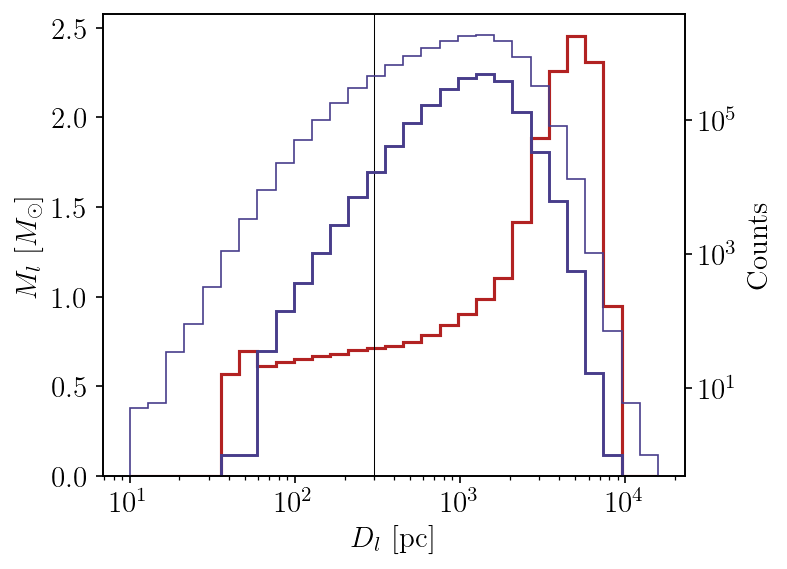

In [223]:
fig,ax = plt.subplots(1,1,figsize=(5,4), dpi = 150)

ax2 = ax.twinx()    
ax2.hist(fore_dist_bins[:-1], bins=fore_dist_bins,weights=dist_counts_wmass, log=True, histtype='step', color='darkslateblue', linewidth=1.4);
ax2.hist(fore_dist_bins[:-1], bins=fore_dist_bins,weights=dist_counts_all, log=True, histtype='step', color='darkslateblue', linewidth=0.8);
ax2.set_ylabel(r'Counts');

ax.hist(fore_dist_bins[:-1], bins=fore_dist_bins,weights=avg_mass, histtype='step', linewidth=1.5, color='firebrick');

ax.set_xscale('log')
ax.axvline(300, 0,1, c='k', linewidth=0.5)

ax.set_xlabel(r'$D_l$ [pc]'); ax.set_ylabel(r'$M_l\ [M_{\odot}]$');
